###                                                Titanic DataSet EDA Report

###### In this project, I analyze the Titanic dataset to predict passenger survival based on variables like Age, Gender, and Class. I use Python, Pandas, and Seaborn for data cleaning and visualization.

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
url ="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [238]:
df =pd.read_csv(url)

## Part 1: Cleaning the Data (Handling Missing Ages)

In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [240]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [241]:
#handing missing value
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

In [242]:
#Remove dublicate
df=df.drop_duplicates()

In [243]:
#Filter print only first class pasanger
first_class =df[df["Pclass"] ==1]
print("First class pasaager \n",first_class.head())

First class pasaager 
     PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
11           12         1       1   
23           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
23      0    113788  35.5000    A6        S  


## Part 1: Cleaning the Data (Handling Missing Ages)

### 1. Bar Chart: Survival Rate


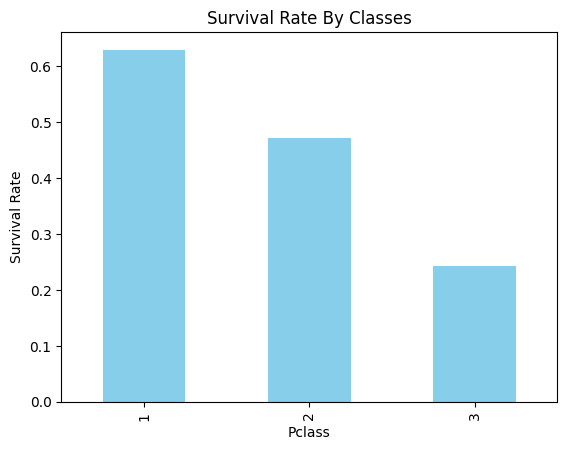

In [244]:
survival_by_clases =df.groupby("Pclass")["Survived"].mean()
survival_by_clases.plot(kind="bar",color ="skyblue")
plt.title("Survival Rate By Classes")
plt.ylabel("Survival Rate")
plt.show()

### 2. Age Distribution

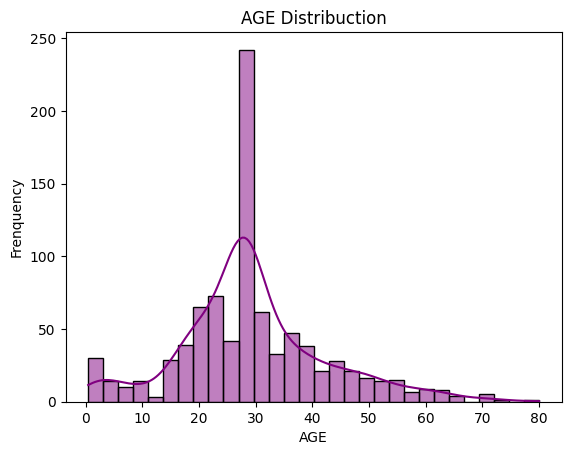

In [259]:
sns.histplot(df["Age"],kde=True,bins=30,color="purple")
plt.title("AGE Distribuction")
plt.xlabel("AGE")
plt.ylabel("Frenquency")
plt.show()

### 3. scatter plot : AGE vs Fare

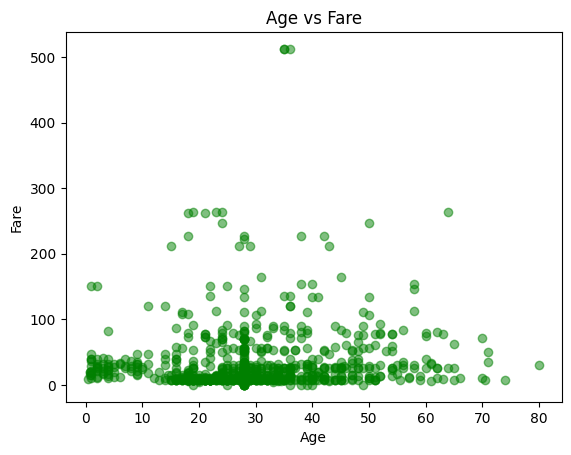

In [246]:
plt.scatter(df["Age"],df["Fare"],alpha=0.5,color ="green")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### 4.Survival by Gender

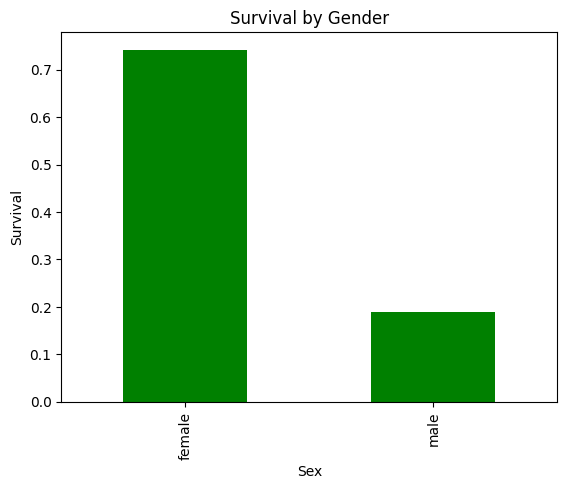

In [247]:
Survival_by_Gender = df.groupby("Sex")["Survived"].mean()
Survival_by_Gender.plot(kind ="bar",color ="green")
plt.title("Survival by Gender")
plt.ylabel("Survival")
plt.show()

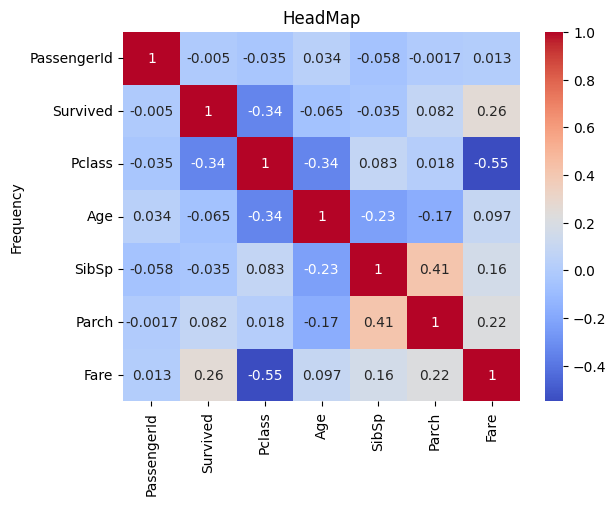

In [261]:
correlation =df.corr(numeric_only =True)
sns.heatmap(correlation,annot=True,cmap ="coolwarm")
plt.title("HeadMap")
plt.ylabel("Frequency")
plt.show()

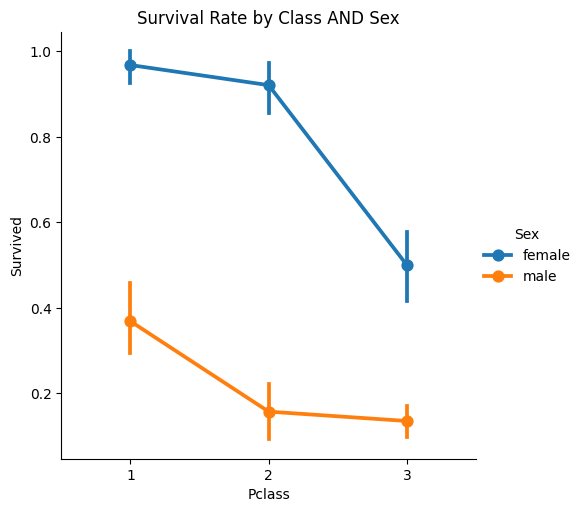

In [264]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=df)
plt.title("Survival Rate by Class AND Sex")
plt.show()


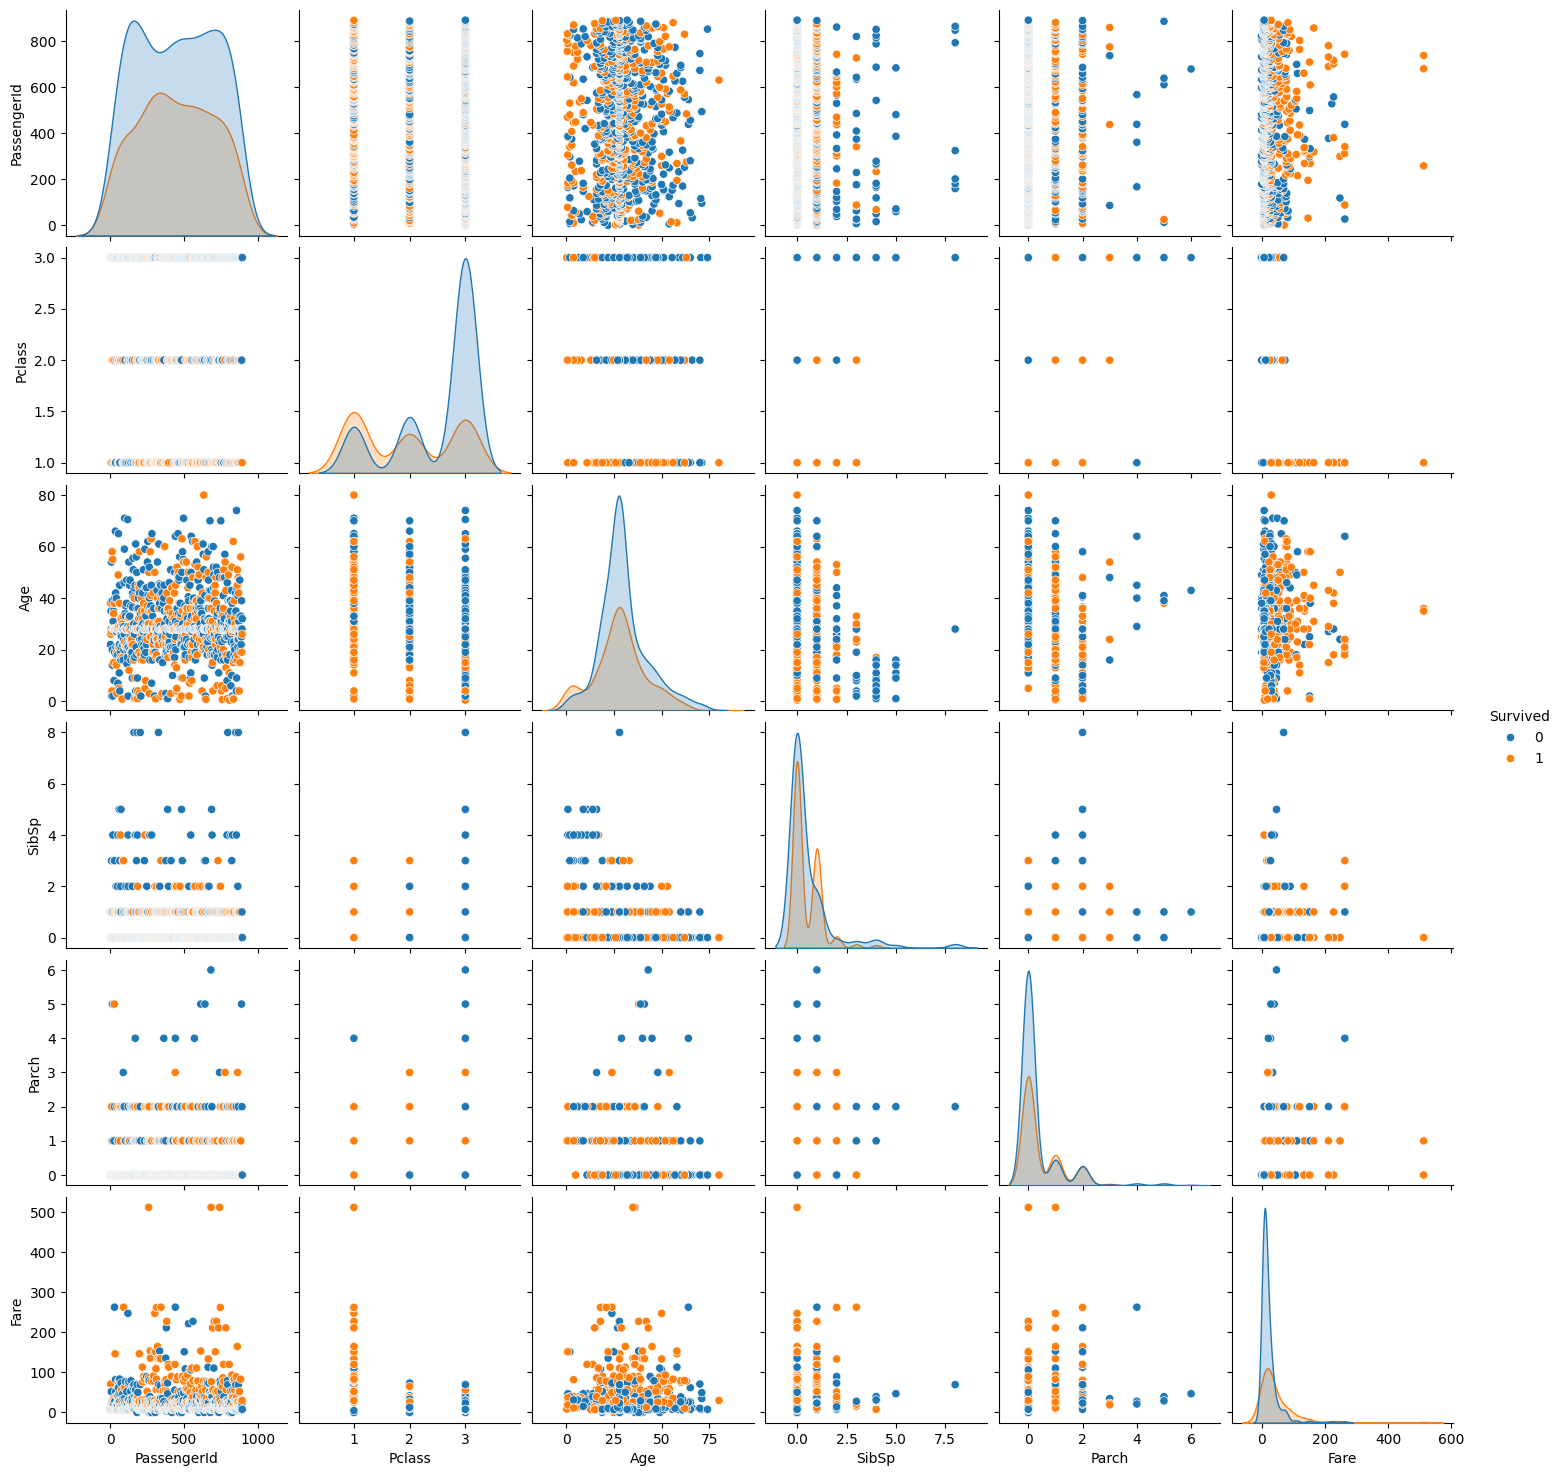

In [251]:
sns.pairplot(df,hue="Survived",diag_kind="kde")
plt.show()

### Final Conclusion

Money Bought Safety: First Class passengers had the highest survival rate, proving that wealth gave people a better chance to escape.

Women First: Gender was the strongest predictor. Females survived at a much higher rate than males, confirming the "Women and Children First" rule.

Young Majority: The Titanic was mostly filled with young adults, with the largest group being 25 to 30 years old.

Data Integrity: I successfully preserved the data by filling missing ages with the median (28) instead of deleting valuable rows.

Final Verdict: Survival was not random—it depended almost entirely on Class and Gender.